# Data Exploration

Explore the preprocessed data.

Moonboard versions: 2016 ; 2017

In [176]:
%matplotlib inline

import os
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# set default size to display larger figures
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Data exploration script

We look into:
    - number of examples
    - number of user labeled examples
    - class distributions
    - holds used for easy (6B+), intermediate (7B+) and hard (8B+) problems

In [237]:
def data_exploration(MBversion, ppDirName="binary"):
    MBversion = str(MBversion)
    print("{:-^100}".format("---Data exploration for MoonBoard version {}---".format(MBversion)))
    # path to the data
    ppVersionDirName = os.path.join(ppDirName, MBversion)
    # import the data
    X = np.load(os.path.join(ppVersionDirName, "X.npy"))
    X_type = np.load(os.path.join(ppVersionDirName, "X_type.npy"))
    y = np.load(os.path.join(ppVersionDirName, "y.npy"))
    y_user = np.load(os.path.join(ppVersionDirName, "y_user.npy"))
    with open(os.path.join(ppVersionDirName, "grade2class.json")) as json_file:  
        grade2class = json.load(json_file)
    
    # number of examples 
    n_examples = X.shape[0]
    print("There are {} examples (distinct MoonBoard version {} problems).".format(n_examples, MBversion))
    
    # user-labeled examples
    y_user_filtered = y_user[y_user != -1]
    n_labeled = y_user_filtered.shape[0]
    print("Only {}% of all the examples have a user-assigned grade.".format(int(n_labeled/n_examples*100)))
    
    # class distribution
    class_min = min(grade2class.values())
    class_max = max(grade2class.values())
    # plot histogram
    plt.hist([y, y_user_filtered], bins = range(class_min, class_max+2), density=True, histtype='bar')
    plt.legend(["true label", "user assigned grade"])
    plt.xticks(list(grade2class.values()), list(grade2class.keys()))
    plt.xlabel("Grade")
    plt.ylabel("Frequency")
    plt.title("class distribution")
    plt.show()
    # print class distribution
    grade2freq = {grade: round(y[y==grade2class[grade]].shape[0]/n_examples*100,2) for grade in grade2class.keys()}
    print("Distribution of classes:\n", grade2freq)
    
    # plot a heatmap of the most used holds
    grades = ["6B+", "7B+", "8B+"]
    
    fig, axn = plt.subplots(1, len(grades))
    cbar_ax = fig.add_axes([.91, .25, .03, .5])

    for i, grade in enumerate(grades):
        # filter holds based on their type: only intermediate holds are kept (as start and end holds tend to be most similar and most frequent)
        mask = X_type == 1
        X_filtered = X*mask
        # filter examples based on their label
        X_filtered = X_filtered[y == grade2class[grade],:]
        # build the heatmap
        heatmap = np.reshape(np.sum(X_filtered, axis=0), (18,11))
        freq_heatmap = heatmap / X_filtered.shape[0]
        # plot the heatmap
        ax = sns.heatmap(freq_heatmap, vmax=0.3, cmap='viridis', linewidth=0.5, square=True, 
                         xticklabels = [str(chr(k)) for k in range(ord("A"), ord("A") + heatmap.shape[1])],
                         yticklabels = range(heatmap.shape[0],0,-1),
                         mask=(freq_heatmap==0), ax=axn[i], 
                         cbar = not i, cbar_ax=None if i else cbar_ax)
        ax.set_title(grade)
    plt.show()

## Moonboard 2016

----------------------------Data exploration for MoonBoard version 2016-----------------------------
There are 27183 examples (distinct MoonBoard version 2016 problems).
Only 39% of all the examples have a user-assigned grade.


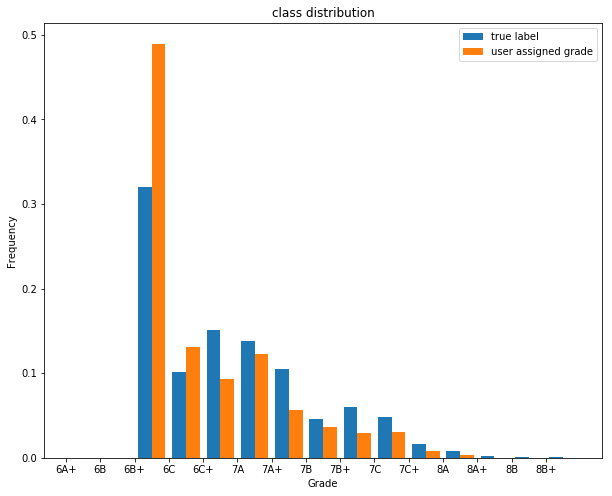

Distribution of classes:
 {'6A+': 0.0, '6B': 0.0, '6B+': 32.01, '6C': 10.1, '6C+': 15.15, '7A': 13.78, '7A+': 10.55, '7B': 4.57, '7B+': 6.05, '7C': 4.82, '7C+': 1.68, '8A': 0.79, '8A+': 0.25, '8B': 0.12, '8B+': 0.12}


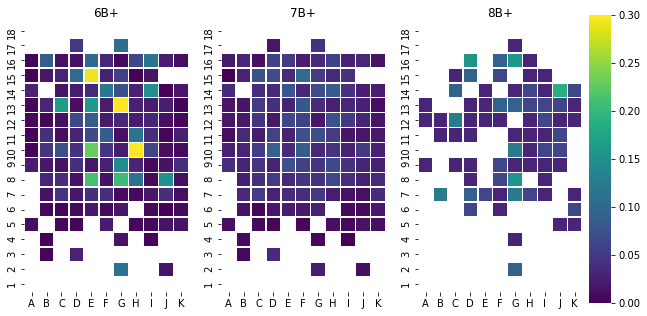

In [238]:
data_exploration(2016)

## Moonboard 2017

----------------------------Data exploration for MoonBoard version 2017-----------------------------
There are 20043 examples (distinct MoonBoard version 2017 problems).
Only 36% of all the examples have a user-assigned grade.


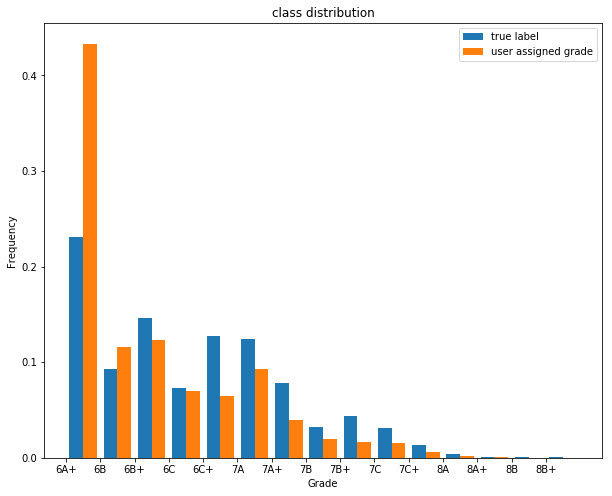

Distribution of classes:
 {'6A+': 23.07, '6B': 9.3, '6B+': 14.59, '6C': 7.28, '6C+': 12.76, '7A': 12.42, '7A+': 7.86, '7B': 3.19, '7B+': 4.34, '7C': 3.14, '7C+': 1.39, '8A': 0.43, '8A+': 0.12, '8B': 0.05, '8B+': 0.05}


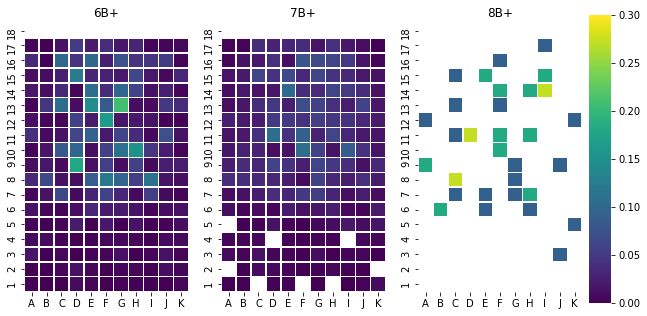

In [239]:
data_exploration(2017)